# Kevin Marin Gómez Lara

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Diplomado CD/Modulo 5/german_credit_data.xlsx")
df = df[df['Age'] > 6][['Sex', 'Duration', 'Credit amount', 'Purpose']]

# Limpieza de datos
df.replace(['---', '               ---', 'NaN', '', ' '], np.nan, inplace=True)

# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(exclude=np.number).columns

# Create imputers for numeric and categorical features
numeric_imputer = SimpleImputer(strategy='mean') # Use 'mean' for numeric features
categorical_imputer = SimpleImputer(strategy='most_frequent') # Use 'most_frequent' for categorical

# Impute missing values separately
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

train_data_or = df  # Assign the imputed DataFrame to train_data_or

In [ ]:
# Escalado de datos
scaler = MinMaxScaler(feature_range=(0, 1))    ###transforma los datos en ceros y uno
# Only scale numeric features
numeric_features = df.select_dtypes(include=np.number).columns
df_scaled = scaler.fit_transform(df[numeric_features])  # Normalizar datos
train_scaled = scaler.fit_transform(df[numeric_features])

def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(df_scaled, time_steps)

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, df_scaled.shape[1])),  # Change input_shape
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(df_scaled.shape[1])  # Change output Dense layer units
])

# Compile the model
model.compile(optimizer='adam', loss='mse') # You can adjust optimizer and loss function as needed

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0405 - val_loss: 0.0307
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0291 - val_loss: 0.0305
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0299 - val_loss: 0.0319
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0298 - val_loss: 0.0301
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0260 - val_loss: 0.0309
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0278 - val_loss: 0.0312
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0301 - val_loss: 0.0306
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0269 - val_loss: 0.0303
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0268 - val_loss: 0.0307
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0271 - val_loss: 0.0304
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0281 - val_loss: 0.0307
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


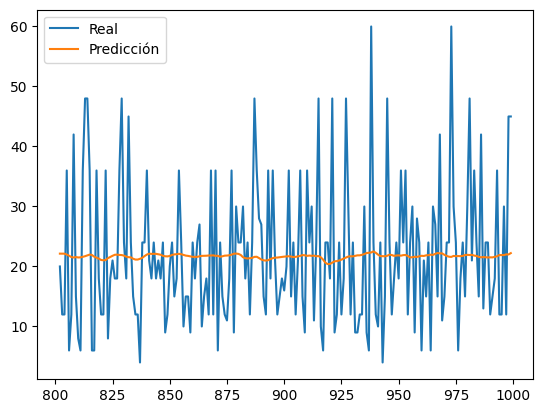

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Desescalar predicciones

# Reshape y_test to match the original number of features before inverse_transform
y_test_reshaped = y_test.reshape(-1, df_scaled.shape[1])
y_test_inverse = scaler.inverse_transform(y_test_reshaped)

# Assuming you want to plot a specific column from the inversed y_test
column_to_plot = 0  # Choose the column index you want to plot

plt.plot(df.index[train_size + time_steps:], y_test_inverse[:, column_to_plot], label='Real')
plt.plot(df.index[train_size + time_steps:], predictions[:, column_to_plot], label='Predicción')
plt.legend()
plt.show()